In [1]:
import random
import numpy as np
from scipy.stats import binom

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def calcula_probs_previas(alpha):
    probas = np.array([1/2+alpha/4, 1/2-alpha/4])
    return(probas)

def simula_muestra(n, p):
    return(binom.rvs(size=1, n=n, p=p))

def calcula_v(alpha, datos, n):
    aux = (datos*np.log(3)-n*np.log(2))[0]
    return(alpha/(1-alpha)*np.exp(aux))

def calcula_probs_posteriores(v):
    probs = np.array([(3*v+2)/(4*(v+1)), (v+2)/(4*(v+1))])
    return(probs)

def calcula_informacion_datos(probs_previas, probs_posteriores):
    return((probs_posteriores*np.log(probs_posteriores/probs_previas)).sum())

In [3]:
ALPHA = 0.1
THETA = 0.75

In [4]:
inf_seq  = []
prob_seq = []

for n in np.arange(1,151):
    samp = simula_muestra(n, THETA)
    v    = calcula_v(ALPHA, samp, n)
    probs_previa      = calcula_probs_previas(ALPHA)
    probs_posterior   = calcula_probs_posteriores(v)
    informacion_datos = calcula_informacion_datos(probs_previa, probs_posterior)
    
    inf_seq.append(informacion_datos)
    prob_seq.append(probs_posterior[0])

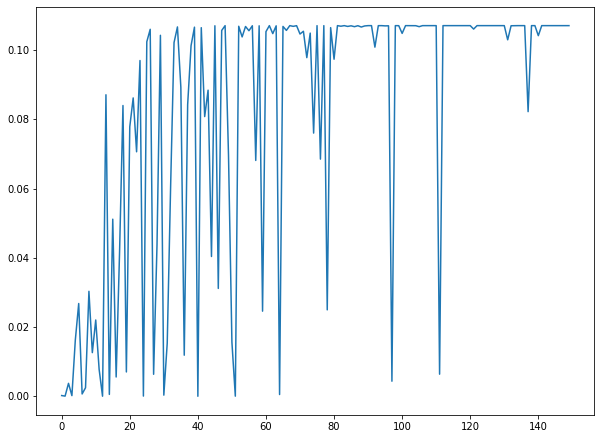

In [5]:
plt.figure(figsize=(10,7.5))
plt.plot(inf_seq)

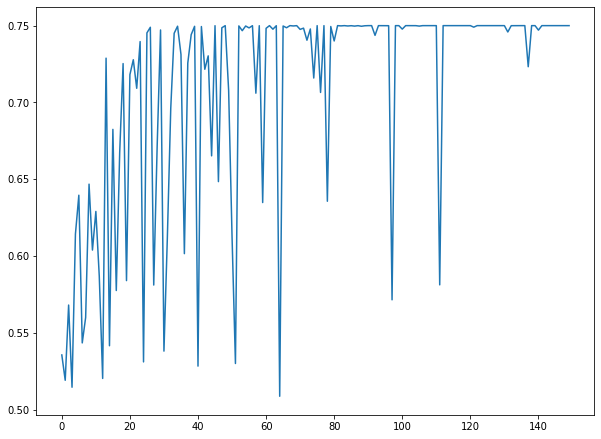

In [6]:
plt.figure(figsize=(10,7.5))
plt.plot(prob_seq)